In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv('ToyotaCorolla - MLR.csv')

In [7]:
print(data.head(),"/n")

   Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170   /n


In [5]:
data.describe()

Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.000000        4.0     3.000000  1000.00000  
25%     1400.00000     3.000000        4.0     5.000000  1040.00000  
50%     1600.00000     4.000000        4.0     5.000000  1070.00000  
75%     1600.00000     5.000000        4.0     5.000000  1085.00000  
max    16000.00000     5.000000        4.0     6.000000  1615.00000

In [9]:
#Handle missing values
#Display the count of missing values for each column
print(data.isnull().sum(), "\n")


Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64 



In [10]:
#There are no missing values We can proceed with the rest of the analysis and modeling without needing to handle any missing data.

In [8]:
#Identify and correct any inconsistencies in data types
print(data.dtypes, "\n")

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object 



In [13]:
#Detect and treat outliers
# Using Z-score to detect outliers in numerical columns
numerical_columns = data.select_dtypes(include=[np.number]).columns
z_scores = np.abs(stats.zscore(data[numerical_columns]))

In [21]:
# Define a threshold for identifying outliers ( Z-score > 3)
outliers = (z_scores > 3)

In [22]:
# Display outliers
print("Outliers detected:")
print(data[numerical_columns][outliers.any(axis=1)], "\n")


Outliers detected:
      Price  Age_08_04     KM   HP  Automatic    cc  Doors  Cylinders  Gears  \
6     16900         27  94612   90          0  2000      3          4      5   
7     18600         30  75889   90          0  2000      3          4      5   
8     21500         27  19700  192          0  1800      3          4      5   
10    20950         25  31461  192          0  1800      3          4      6   
11    19950         22  43610  192          0  1800      3          4      6   
...     ...        ...    ...  ...        ...   ...    ...        ...    ...   
1421   8500         78  36000   86          1  1300      3          4      5   
1423   7950         80  35821   86          1  1300      3          4      5   
1426   9950         78  30964  110          1  1600      3          4      4   
1427   8950         71  29000   86          1  1300      3          4      5   
1429   8950         78  24000   86          1  1300      5          4      5   

      Weight  
6    

In [23]:
# Treat outliers by capping them at the 95th percentile
for column in numerical_columns:
    percentile_95 = data[column].quantile(0.95)
    data[column] = np.where(data[column] > percentile_95, percentile_95, data[column])

In [24]:
print(data.head(), "\n")

     Price  Age_08_04       KM Fuel_Type    HP  Automatic      cc  Doors  \
0  13500.0       23.0  46986.0    Diesel  90.0        0.0  2000.0    3.0   
1  13750.0       23.0  72937.0    Diesel  90.0        0.0  2000.0    3.0   
2  13950.0       24.0  41711.0    Diesel  90.0        0.0  2000.0    3.0   
3  14950.0       26.0  48000.0    Diesel  90.0        0.0  2000.0    3.0   
4  13750.0       30.0  38500.0    Diesel  90.0        0.0  2000.0    3.0   

   Cylinders  Gears  Weight  
0        4.0    5.0  1150.0  
1        4.0    5.0  1150.0  
2        4.0    5.0  1150.0  
3        4.0    5.0  1150.0  
4        4.0    5.0  1150.0   



In [25]:
d_numeric = data.select_dtypes(include=['number'])
print(d_numeric)

        Price  Age_08_04       KM     HP  Automatic      cc  Doors  Cylinders  \
0     13500.0       23.0  46986.0   90.0        0.0  2000.0    3.0        4.0   
1     13750.0       23.0  72937.0   90.0        0.0  2000.0    3.0        4.0   
2     13950.0       24.0  41711.0   90.0        0.0  2000.0    3.0        4.0   
3     14950.0       26.0  48000.0   90.0        0.0  2000.0    3.0        4.0   
4     13750.0       30.0  38500.0   90.0        0.0  2000.0    3.0        4.0   
...       ...        ...      ...    ...        ...     ...    ...        ...   
1431   7500.0       69.0  20544.0   86.0        0.0  1300.0    3.0        4.0   
1432  10845.0       72.0  19000.0   86.0        0.0  1300.0    3.0        4.0   
1433   8500.0       71.0  17016.0   86.0        0.0  1300.0    3.0        4.0   
1434   7250.0       70.0  16916.0   86.0        0.0  1300.0    3.0        4.0   
1435   6950.0       76.0      1.0  110.0        0.0  1600.0    5.0        4.0   

      Gears  Weight  
0    

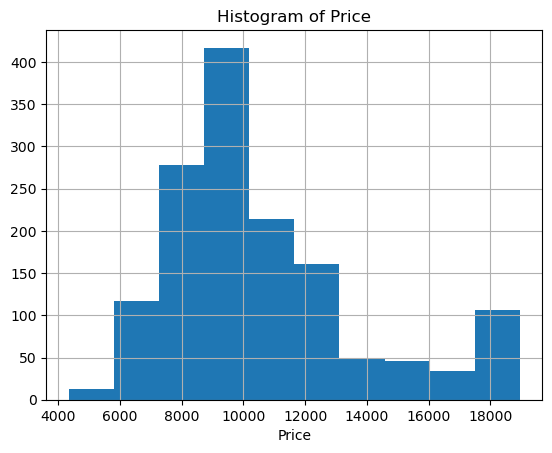

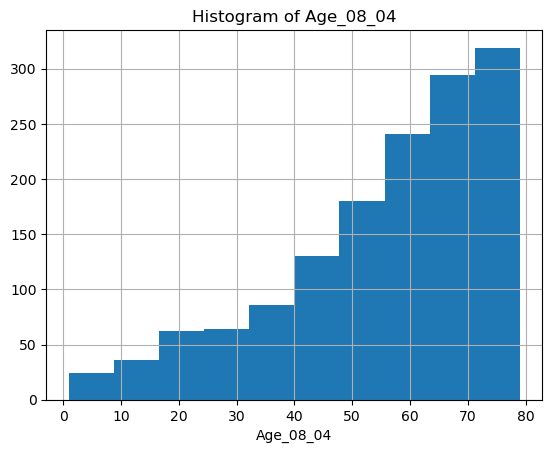

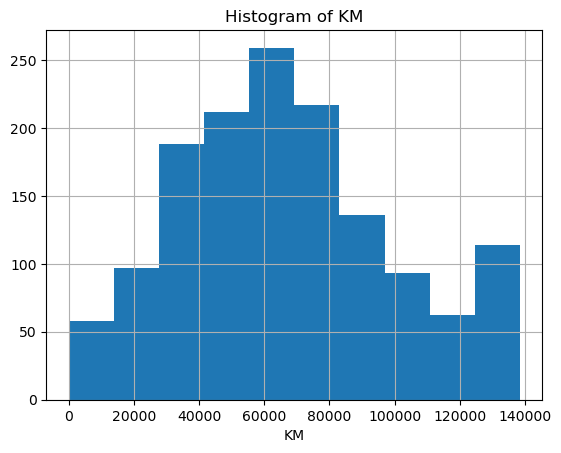

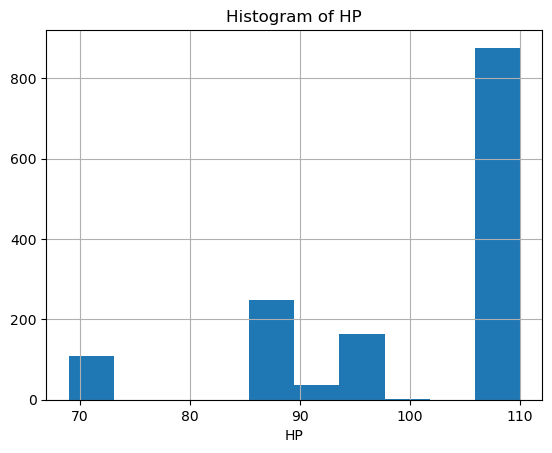

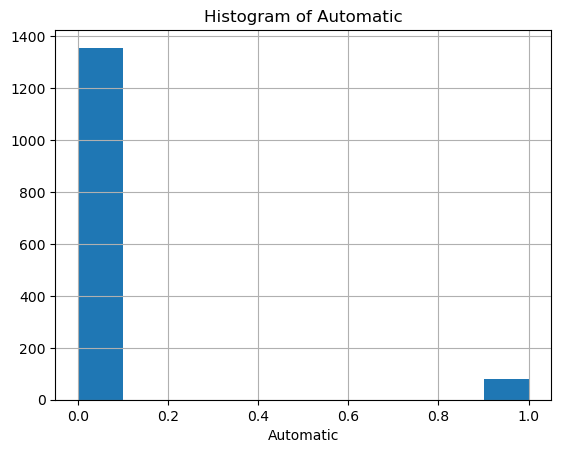

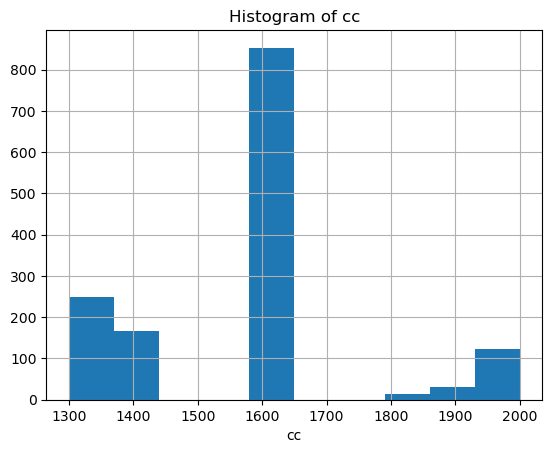

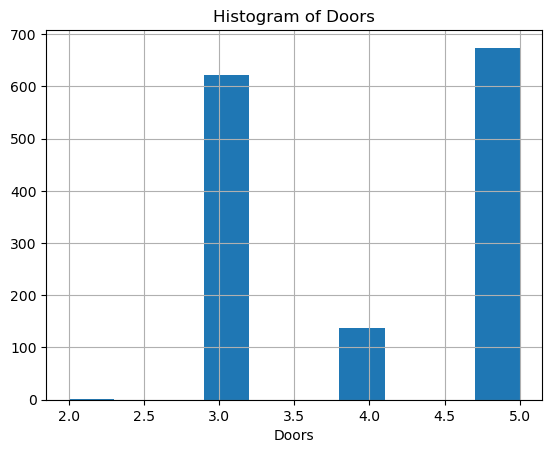

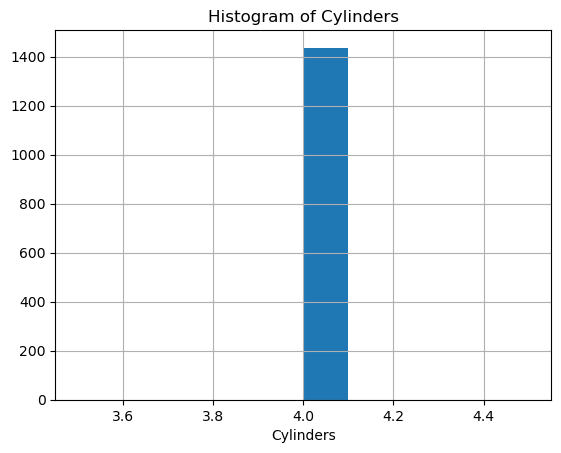

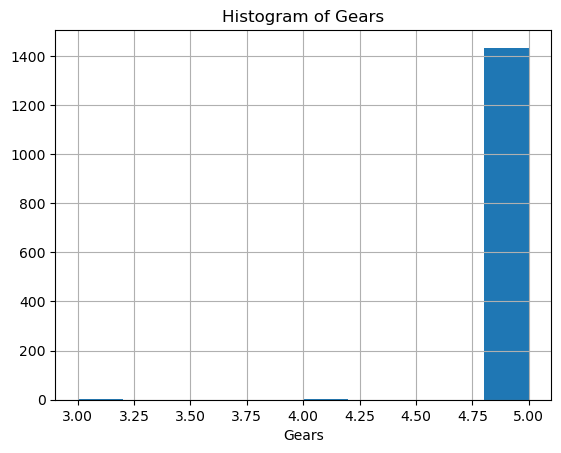

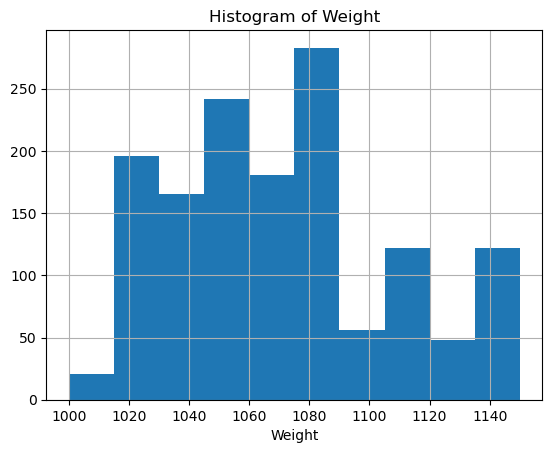

In [26]:
# Plotting Histogram 
for column in d_numeric.columns:
    plt.figure()
    d_numeric[column].hist()
    
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)

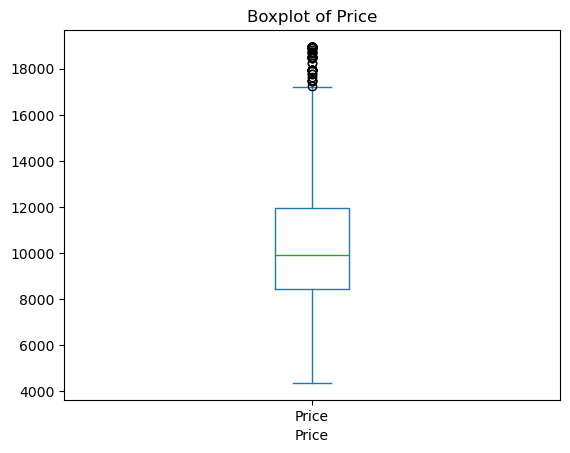

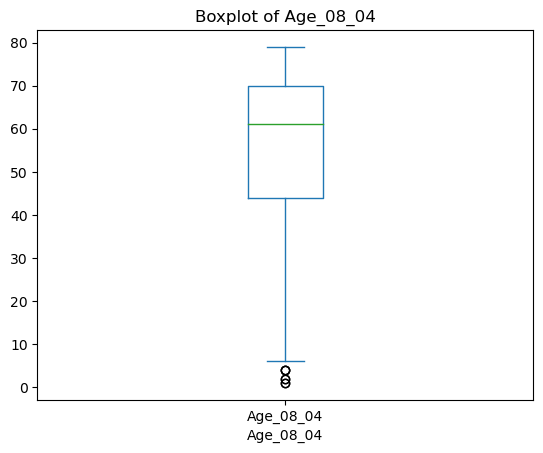

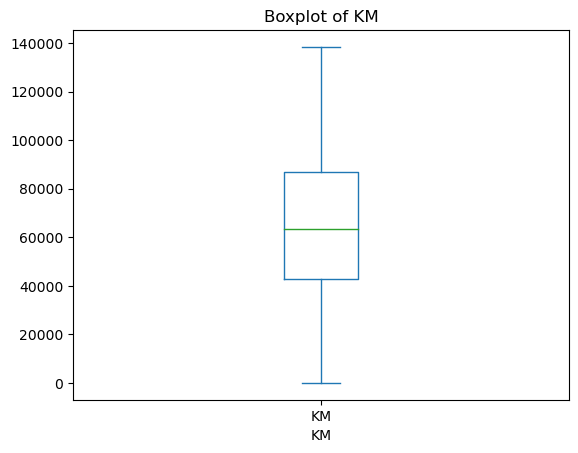

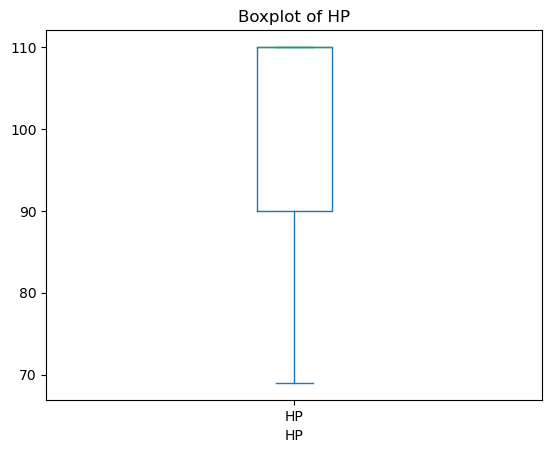

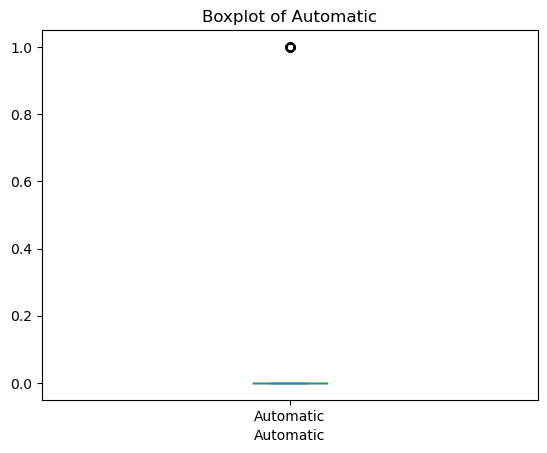

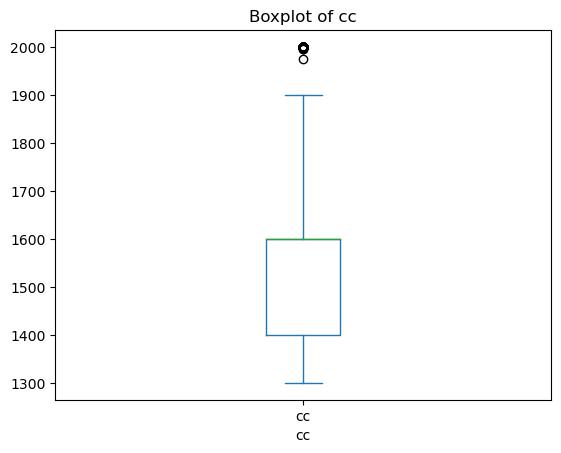

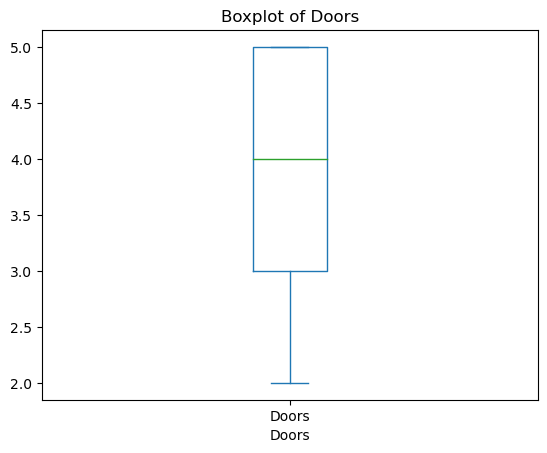

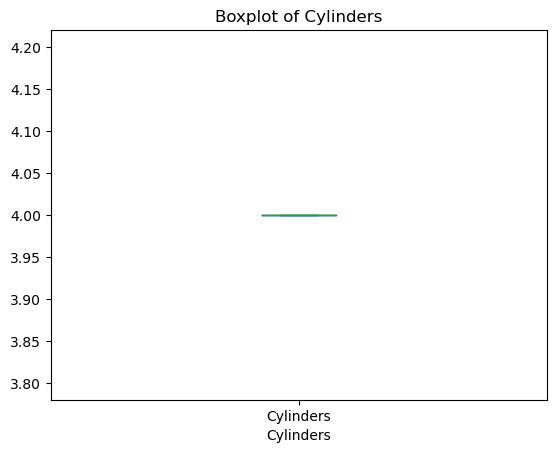

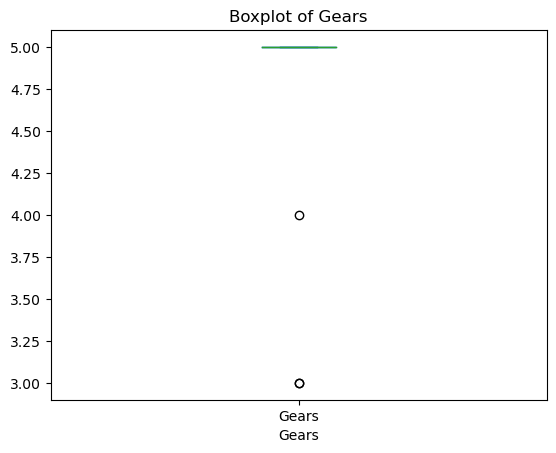

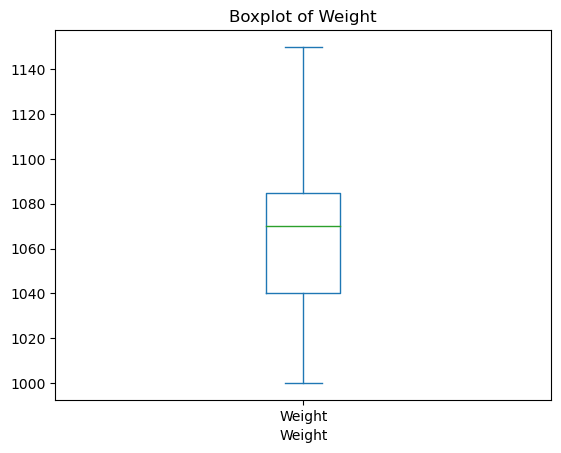

In [27]:
# Plotting boxplot
for column in d_numeric.columns:
    plt.figure()
    d_numeric[column].plot(kind = 'box')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

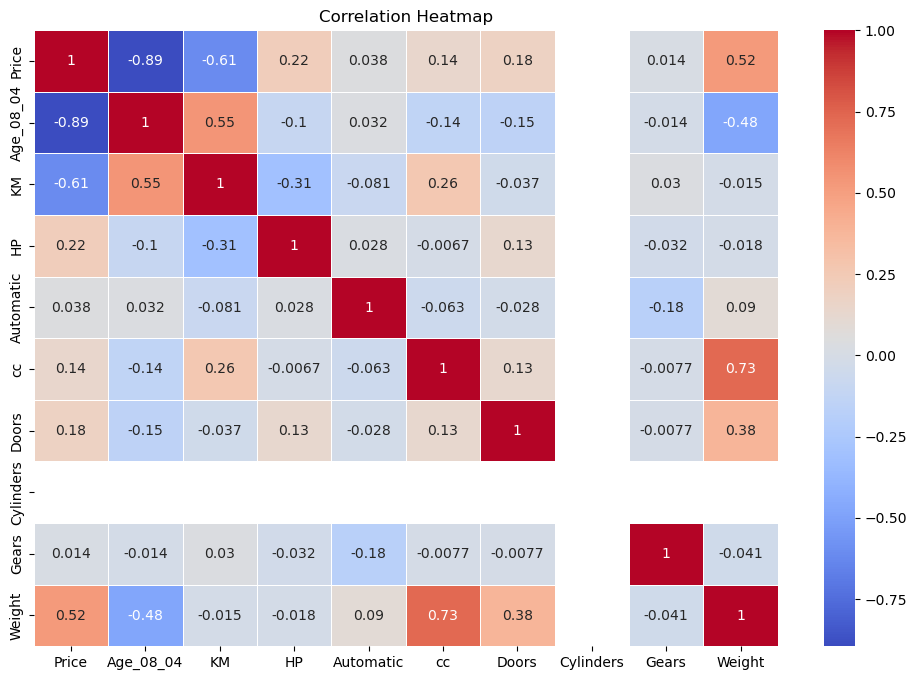

In [28]:
# Generate a correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
"""positive correlation 
    cc and weight: 0.73
    price weight : 0.52
    
    Negative Correlation
    not much but
    Age and price: -0.89 """

C:\Users\vinit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


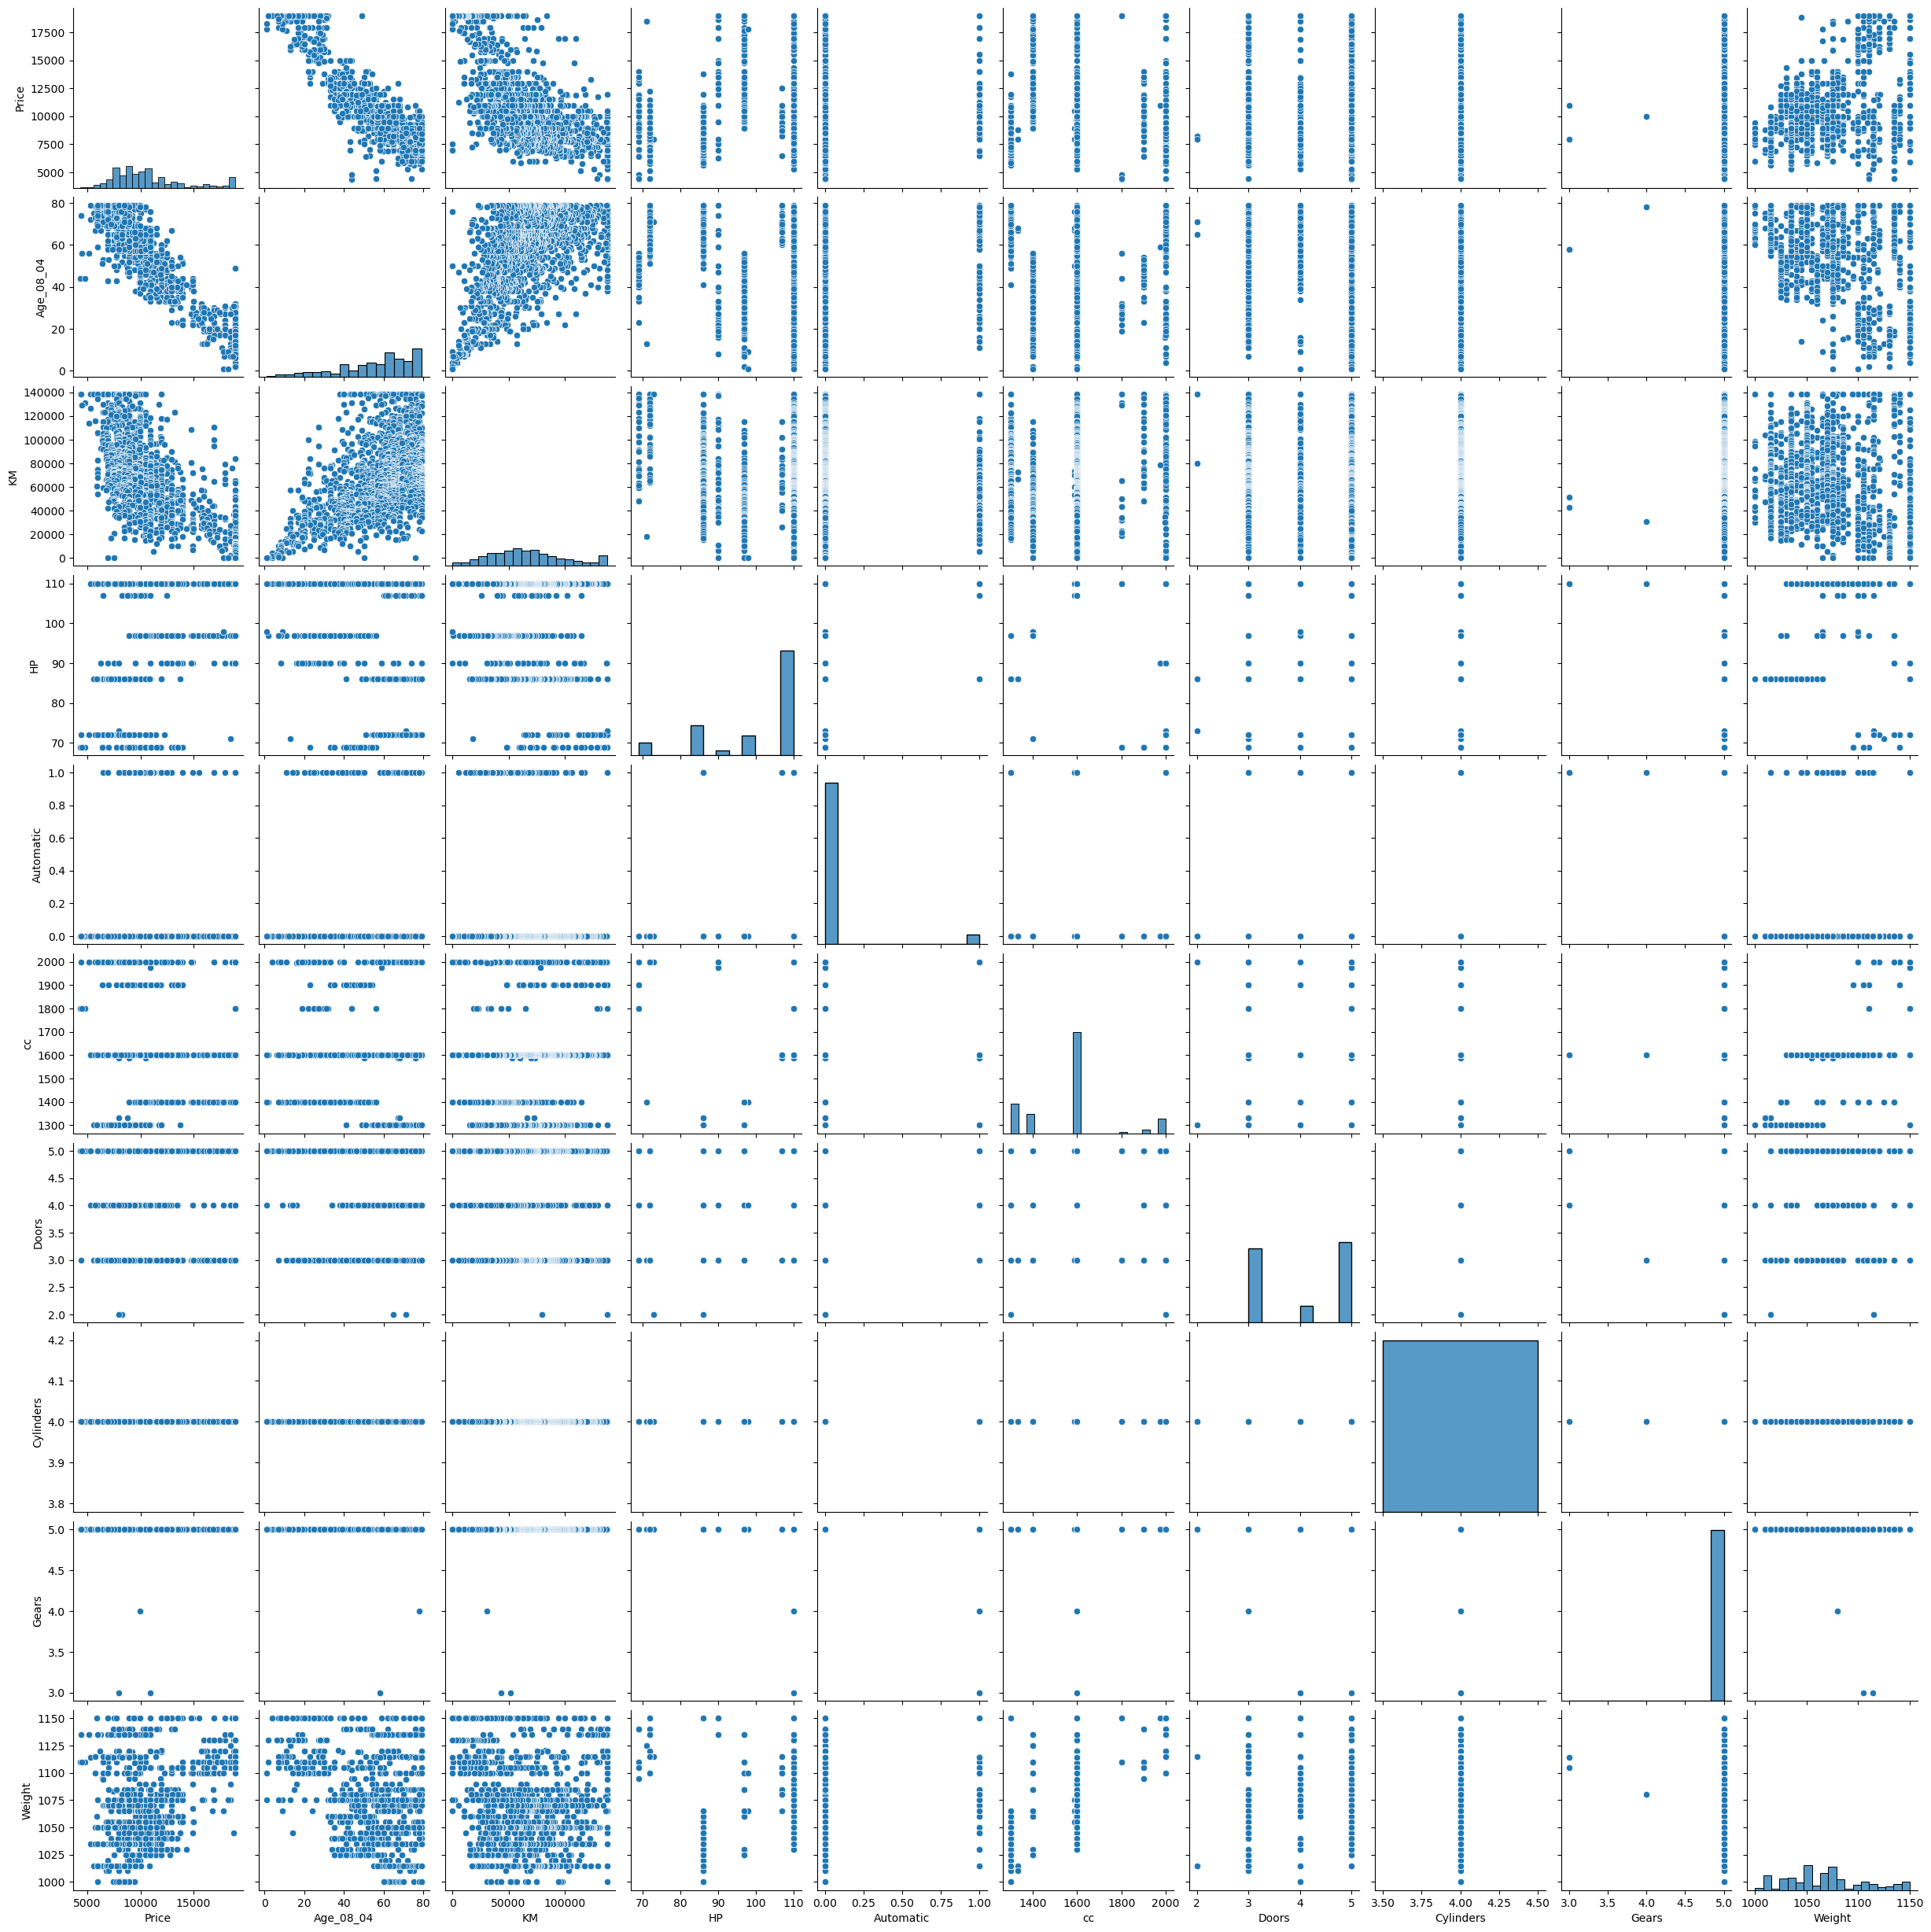

In [29]:
sns.pairplot(data[numerical_columns])
plt.show()


In [37]:
data = pd.get_dummies(data, columns=['Fuel_Type'], drop_first=True)


In [39]:
# Splitting the data
X = data.drop('Price', axis=1)
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
# Model 1: Simple Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

In [43]:
# Model 2: Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

In [44]:
# Model 3: Ridge Regression
ridge = Ridge(alpha=0.1)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

In [45]:
# Evaluation
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse:.2f}, R^2 Score: {r2:.2f}")

In [46]:
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")


Linear Regression - Mean Squared Error: 1343340.60, R^2 Score: 0.87
Lasso Regression - Mean Squared Error: 1343187.38, R^2 Score: 0.87
Ridge Regression - Mean Squared Error: 1343302.03, R^2 Score: 0.87


In [55]:
""" The results show that all three regression models (Linear Regression, Lasso Regression, and Ridge Regression) 
have similar performance,with a high R^2 Score of 0.87 and Mean Squared Error (MSE) around 1,343,000."""

' The results show that all three regression models (Linear Regression, Lasso Regression, and Ridge Regression) \nhave similar performance,with a high R^2 Score of 0.87 and Mean Squared Error (MSE) around 1,343,000.'

In [56]:
"""This indicates that the models explain a significant portion of the variance in 
the data and have similar predictive performance."""

'This indicates that the models explain a significant portion of the variance in \nthe data and have similar predictive performance.'

In [48]:
# Displaying the coefficients of each model
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Linear Regression': lr.coef_,
    'Lasso Regression': lasso.coef_,
    'Ridge Regression': ridge.coef_
})

print(coefficients)

             Feature  Linear Regression  Lasso Regression  Ridge Regression
0          Age_08_04      -2.158534e+03      -2158.974347      -2158.388721
1                 KM      -5.468282e+02       -547.099924       -547.047182
2                 HP       2.277242e+02        223.794253        227.001710
3          Automatic       4.858706e+00          4.785151          4.878770
4                 cc      -3.088428e+02       -303.576727       -307.755447
5              Doors      -1.406153e+02       -140.213716       -140.485727
6          Cylinders      -2.273737e-13          0.000000          0.000000
7              Gears       7.024189e+01         70.194977         70.273039
8             Weight       1.129383e+03       1128.374221       1129.058608
9   Fuel_Type_Diesel       2.146213e+02        206.996843        213.007379
10  Fuel_Type_Petrol       4.826484e+02        480.839156        482.009304


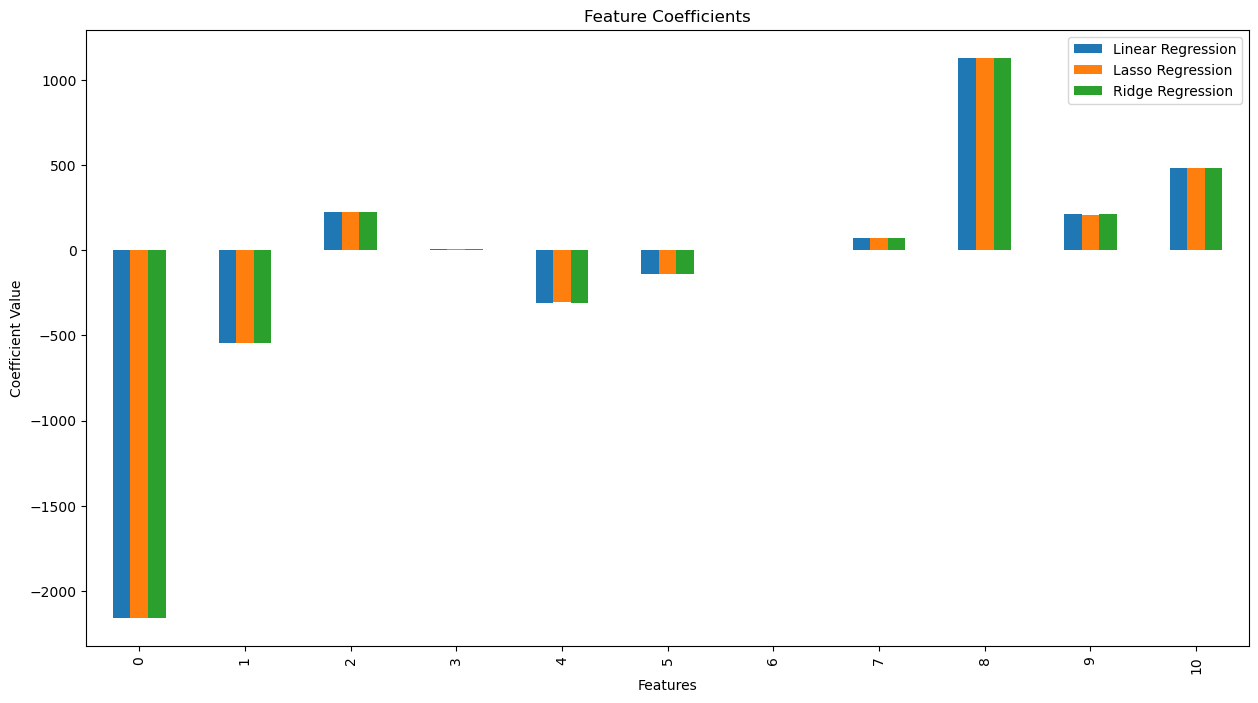

In [49]:
#Visualizing the coefficients can help us understand the impact of each feature across different models:
coefficients.plot(kind='bar', figsize=(15, 8))
plt.title('Feature Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.legend(loc='upper right')
plt.show()

In [ ]:
"""What is Normalization & Standardization and how is it helpful?
Normalization (also known as min-max scaling) rescales the features to a fixed range, typically [0, 1]. 
This is done by subtracting the minimum value of the feature and dividing by maximum value minus minimum value.

Standardization (also known as Z-score normalization) transforms the features to have a mean of 0 and a standard 
deviation of 1. This is done by subtracting the mean of the feature and dividing by the standard deviation.

how is it helpful

-Equal Weighting of Features: Scaling ensures that each feature contributes equally to the distance computations 
 in algorithms such as k-nearest neighbors (KNN) and support vector machines (SVM).
-Enhanced Model Performance: Many machine learning models assume that the input data is centered around zero and/or
 has unit variance. Scaling can lead to better model performance and stability."""

In [ ]:
""".What techniques can be used to address multicollinearity in multiple linear regression?
Multicollinearity occurs when two or more predictor variables in a multiple linear regression model are highly correlated. 
This can cause problems in estimating the coefficients accurately.

TECHNIQUES

-Principal Component Analysis (PCA)
-Ridge Regression
-Lasso Regression
-Remove Redundant Data"""